In [7]:
#Description : predict the future price of a stock using machine learning , ARIMA and python

In [8]:
import pandas as pd

In [10]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [11]:
#select the date and the price
df = df[['Date', 'Close']]
#Rename the features
df = df.rename(columns={'Date':'ds','Close' : 'y'})
#Show the data
df

,ds,y
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2951,2022-03-18,905.390015
2952,2022-03-21,921.159973
2953,2022-03-22,993.979980
2954,2022-03-23,999.109985


In [12]:
#Get the last 20 rows of data and store into a new variable
last = df[len(df)-20:]
last

,ds,y
2936,2022-02-25,809.869995
2937,2022-02-28,870.429993
2938,2022-03-01,864.369995
2939,2022-03-02,879.890015
2940,2022-03-03,839.289978
2941,2022-03-04,838.289978
2942,2022-03-07,804.580017
2943,2022-03-08,824.400024
2944,2022-03-09,858.969971
2945,2022-03-10,838.299988


In [14]:
#Get all the rows in the dataset except for the last 20 rows of the data
df = df[:-20]
df

,ds,y
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2911,2022-01-20,996.270020
2912,2022-01-21,943.900024
2913,2022-01-24,930.000000
2914,2022-01-25,918.400024


In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame with 'ds' (date) and 'y' (value) columns

# Determine the order of the ARIMA model (p, d, q)
# This might require some experimentation and model selection techniques
# For demonstration, let's use (5, 1, 0)
p = 5
d = 1
q = 0

# Fit the ARIMA model
model = ARIMA(df['y'], order=(p, d, q))
model_fit = model.fit()

# Make predictions for the next 20 periods
future_dates = pd.date_range(start=df['ds'].iloc[-1], periods=21)[1:]  # Start from the day after the last date in df
predictions = model_fit.predict(start=len(df), end=len(df)+19)

# Create a DataFrame for the forecast
forecast = pd.DataFrame({'ds': future_dates, 'yhat': predictions})

print(forecast)

             ds        yhat
2916 2022-01-27  937.152498
2917 2022-01-28  934.890548
2918 2022-01-29  935.361481
2919 2022-01-30  934.513627
2920 2022-01-31  935.240183
2921 2022-02-01  935.261614
2922 2022-02-02  935.129550
2923 2022-02-03  935.197568
2924 2022-02-04  935.147959
2925 2022-02-05  935.174155
2926 2022-02-06  935.179040
2927 2022-02-07  935.170405
2928 2022-02-08  935.175440
2929 2022-02-09  935.172932
2930 2022-02-10  935.173684
2931 2022-02-11  935.174204
2932 2022-02-12  935.173647
2933 2022-02-13  935.173950
2934 2022-02-14  935.173842
2935 2022-02-15  935.173846


TypeError: tz must be string or tzinfo subclass.

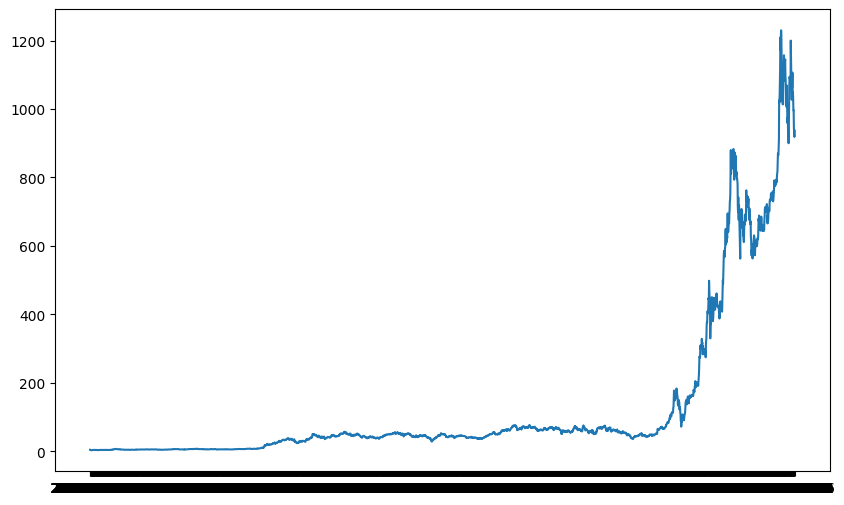

In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'ds' (datetime) and 'y' (price)
# and a forecast DataFrame with columns 'ds' and 'yhat'

# Ensure 'ds' in forecast is datetime and set timezone
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.tz_localize(None)

# Plot the actual values and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual', linestyle='-')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
